## Assignment 1
### Name: Barun Parua
### Roll Number: 21CS10014

First of all, we take the csv input and convert it into a pandas dataframe for easier manipulation. We then apply normalisation and then split the data to appropriate subsets for training, validation and testing purposes.

In [246]:
# importing all the necessary libraries
# pandas for reading the csv file, numpy for mathematical operations, matplotlib for plotting the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
# extracting the data from the csv file, checking the shape of the data and splitting the data into x and y values
df = pd.read_csv('../../dataset/linear-regression.csv')
print("Shape of the dataset: ", df.shape)

# randomizing the dataset
df = df.sample(frac=1).reset_index(drop=True)

# splitting the data into x and y values
x_total = df.iloc[:, :-1].values
y_total = df.iloc[:, -1].values
print("Shape of x:", x_total.shape, "Shape of y:", y_total.shape)

# print the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset: ")
df.head()

Shape of the dataset:  (1599, 12)
Shape of x: (1599, 11) Shape of y: (1599,)

First 5 rows of the dataset: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6
1,8.8,0.33,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,7
2,11.6,0.41,0.58,2.8,0.096,25.0,101.0,1.00024,3.13,0.53,10.0,5
3,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,5
4,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6


In [248]:
# normalise the data using mean and standard deviation to avoid overflow and/or underflow errors
for i in range(0, len(x_total[0])):
    mean = np.mean(x_total[:, i])
    std = np.std(x_total[:, i])
    x_total[:, i] = (x_total[:, i] - mean) / std

In [249]:
# split the data into train, test and validation set
# train set: 50%
# validation set: 30%
# test set: 20%
train_size = int(0.5 * len(x_total))
validation_size = int(0.3 * len(x_total))
test_size = int(0.2 * len(x_total))

# splitting the data into train, test and validation set
x_train = x_total[:train_size]
x_validation = x_total[train_size:train_size+validation_size]
x_test = x_total[train_size+validation_size:]

y_train = y_total[:train_size]
y_validation = y_total[train_size:train_size+validation_size]
y_test = y_total[train_size+validation_size:]

# check the shape of the data
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (799, 11)
Shape of y_train:  (799,)
Shape of x_test:  (321, 11)
Shape of y_test:  (321,)


After this, we use the analytical solution to find the optimal values of the parameters. It can be easily calculated using the matrix operations. The analytical solution is given below.

Then we use our obtained parameters to predict the values of the test data. We calculate the MSE, RMSE and R2 score for the test data. The results are shown below. It can be seen that all values lie close to the expected values.

In [250]:
# analytical solution
# add a column of ones to x_train to account for the bias term
x_train = np.column_stack((np.ones((x_train.shape[0], 1)), x_train))
x_validation = np.column_stack((np.ones((x_validation.shape[0], 1)), x_validation))
print("x_train.shape: ", x_train.shape)

# using the formula derived in the class to calculate the optimal value of theta
theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print("theta analytical: ")
print(theta)

x_train.shape:  (799, 12)
theta analytical: 
[ 5.65288157  0.16625603 -0.16498088 -0.03147587  0.07752677 -0.09422329
  0.05661931 -0.08364992 -0.11344123  0.03629502  0.16045627  0.27588904]


In [251]:
# apply the linear regression model on the test data and calculate the MSE, RMSE and R2 score
x_test = np.column_stack((np.ones((x_test.shape[0],1)), x_test))

y_pred = np.dot(x_test, theta)

print("Analytical Solution Results:")

# calculate the MSE and RMSE values
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate the R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

Analytical Solution Results:
Mean Squared Error:  0.3344296298860665
Root Mean Squared Error:  0.5782989105005011
R2 Score:  0.38172880197556003


In [252]:
# gradient descent method
# necessary functions for gradient descent method defined

def cost(x,y,theta):
    return np.sum((x.dot(theta)-y)**2)/len(y)

def gradient_descent(x,y,theta,learning_rate):
    return theta - learning_rate * x.T.dot(x.dot(theta)-y)/len(y)

Finally, we do the Gradient Descent and find the optimal values of the parameters theta using different learning rates. It can be seen that the number of iterations is less for higher learning rates. This is because the step size is larger for higher learning rates and hence the convergence is faster. Therefore I have set it such that number of iterations for a learning rate is 10 * (1/learning_rate_value).

It can be seen that the cost value attains a minimum value in each case as we have set the iterations properly. Hence, again the parameters are used to predict the values of y for the test data and the corresponding MSE, RMSE and R2 scores are calculated. The results for all the learning rates are shown below.

Analysis for Learning Rate = 0.1 with 100 iterations: 
Theta: 
[ 5.65204929 -0.01046256 -0.27547438 -0.16788233 -0.01802289 -0.0677578
 -0.04165113  0.04194638  0.1641189  -0.06711984  0.11306276  0.4727506 ]
Mean Squared Error:  0.3584313864094794
Root Mean Squared Error:  0.5986913949686261
R2 Score:  0.3373559550915176


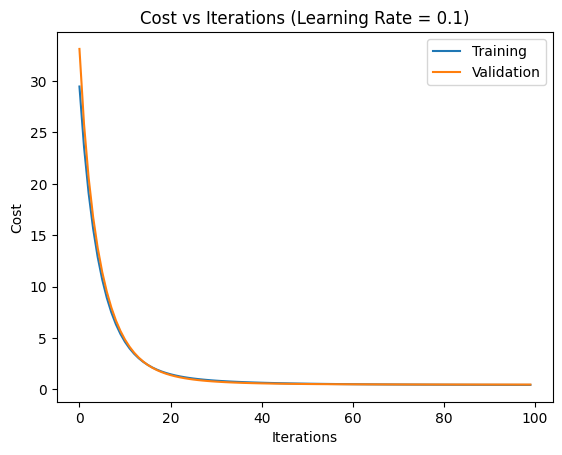

In [253]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates
# doing the same for validation set and plotting the cost vs iterations graph for both training and validation set
theta_grad = np.random.randn(x_train.shape[1])
theta_grad_validation = np.random.randn(x_validation.shape[1])
costs = []
costs_validation = []
learning_rate = 0.1
for i in range(100):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
    costs_validation.append(cost(x_validation, y_validation, theta_grad_validation))
    theta_grad_validation = gradient_descent(x_validation, y_validation, theta_grad_validation, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# apply the obtained theta on the test set and calculate the MSE, RMSE and R2 score
y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations using matplotlib
plt.plot(costs)
plt.plot(costs_validation)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.1)')
plt.legend(['Training', 'Validation'])
plt.show()

Analysis for Learning Rate = 0.01 with 1000 iterations: 
Theta: 
[ 5.6515194   0.04012615 -0.18807285 -0.05115669  0.02987412 -0.09712325
  0.05234857 -0.07358435  0.02377951 -0.03283005  0.1396279   0.35967293]
Mean Squared Error:  0.3359275374544818
Root Mean Squared Error:  0.5795925615934713
R2 Score:  0.37895957035224515


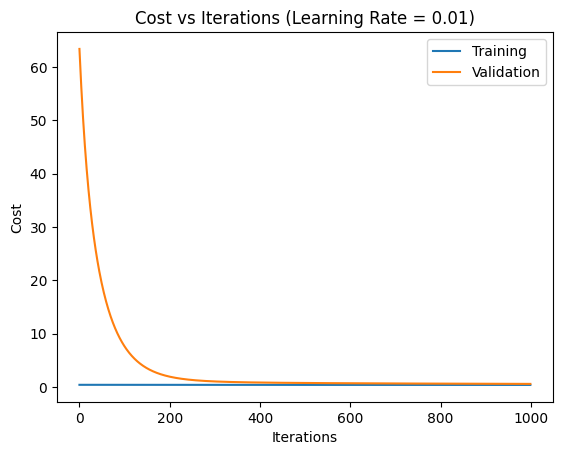

In [254]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates
# doing the same for validation set and plotting the cost vs iterations graph for both training and validation settheta_grad = np.random.randn(x_train.shape[1])
theta_grad_validation = np.random.randn(x_validation.shape[1])
costs = []
costs_validation = []
learning_rate = 0.01
for i in range(1000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
    costs_validation.append(cost(x_validation, y_validation, theta_grad_validation))
    theta_grad_validation = gradient_descent(x_validation, y_validation, theta_grad_validation, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# use the theta obtained from gradient descent to predict the values of y for test set and calculate the MSE, RMSE and R2 score
y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations using matplotlib
plt.plot(costs)
plt.plot(costs_validation)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.01)')
plt.legend(['Training', 'Validation'])
plt.show()

Analysis for Learning Rate = 0.001 with 10000 iterations: 
Theta: 
[ 5.65440035  0.17562298 -0.17077238 -0.03255605  0.08195285 -0.09312945
  0.01602821 -0.04236019 -0.11996021  0.05194139  0.16413242  0.27614771]
Mean Squared Error:  0.3356727332292833
Root Mean Squared Error:  0.5793727066658243
R2 Score:  0.3794306354119673


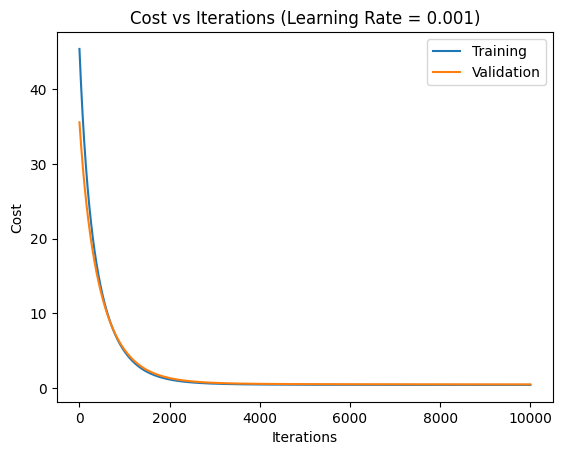

In [255]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates
# doing the same for validation set and plotting the cost vs iterations graph for both training and validation set
theta_grad = np.random.randn(x_train.shape[1])
theta_grad_validation = np.random.randn(x_validation.shape[1])
costs = []
costs_validation = []
learning_rate = 0.001
for i in range(10000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
    costs_validation.append(cost(x_validation, y_validation, theta_grad_validation))
    theta_grad_validation = gradient_descent(x_validation, y_validation, theta_grad_validation, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# use the theta obtained from gradient descent to predict the values of y for test set and calculate the MSE, RMSE and R2 score
y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations using matplotlib
plt.plot(costs)
plt.plot(costs_validation)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.001)')
plt.legend(['Training', 'Validation'])
plt.show()

Analysis for Learning Rate = 0.0001 with 100000 iterations: 
Theta: 
[ 5.64551149 -0.39845045 -0.23178988 -0.06887924 -0.12511408 -0.11844579
  0.09818512 -0.10766971  0.46389043 -0.27154872  0.07146922  0.61365284]
Mean Squared Error:  0.38874782719210454
Root Mean Squared Error:  0.6234964532313753
R2 Score:  0.28130894104884363


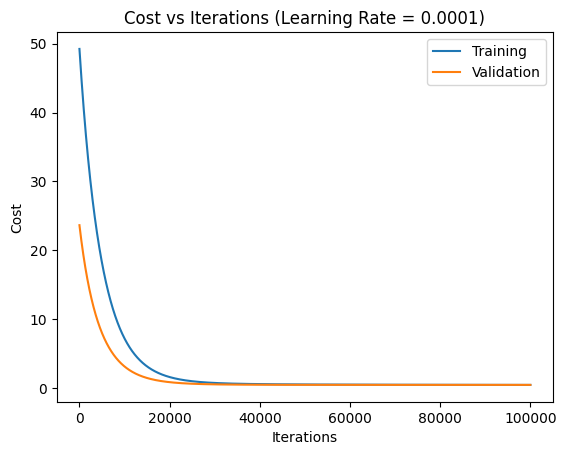

In [256]:
# applying gradient descent on the train set for appropriate number of iterations with different learning rates
# doing the same for validation set and plotting the cost vs iterations graph for both training and validation set
theta_grad = np.random.randn(x_train.shape[1])
theta_grad_validation = np.random.randn(x_validation.shape[1])
costs = []
costs_validation = []
learning_rate = 0.0001
for i in range(100000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
    costs_validation.append(cost(x_validation, y_validation, theta_grad_validation))
    theta_grad_validation = gradient_descent(x_validation, y_validation, theta_grad_validation, learning_rate)
print("Analysis for Learning Rate =", learning_rate, "with", i+1, "iterations: ")
print("Theta: ")
print(theta_grad)

# use the theta obtained from gradient descent to predict the values of y for test set and calculate the MSE, RMSE and R2 score
y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations using matplotlib
plt.plot(costs)
plt.plot(costs_validation)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.0001)')
plt.legend(['Training', 'Validation'])
plt.show()